In [1]:
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.ticker as tkr

import time

import sys
sys.path.append('../velocileptors/')

from zeldovich_bispectrum import ZeldovichBispectrum
from velocileptors.Utils.loginterp import loginterp

In [2]:
Dfac = 1.0

klin, plin = np.loadtxt('planck_pk.txt', unpack=True);

lpt = ZeldovichBispectrum(klin, Dfac * plin, kint_max=0.5)

## Figure 3

In [3]:
dx = 0.05
eps = 0.02

x2s = np.arange(0, 1.0+dx, dx); x2s = (1 - 2*eps)*x2s + 1.5 * eps
x3s = np.arange(0, 1.0+dx, dx); x3s = (1 - 2*eps)*x3s + eps

X2s, X3s = np.meshgrid(x2s, x3s);
Bs = np.zeros_like(X2s)
mask = np.ones_like(X2s)


for ii, x2 in enumerate(x2s):
    for jj, x3 in enumerate(x3s):
                
        if x2 >= x3 - eps and (x2 + x3) >= 1 - eps:
            mask[jj, ii] = 0

In [4]:
Btreesa = np.zeros_like(X2s)
Bloopa = np.zeros_like(X2s)
BZela = np.zeros_like(X2s)


k1a = 0.1

for ii, x2 in enumerate(x2s):
    for jj, x3 in enumerate(x3s):
        
        if x2 >= x3 and (x2 + x3) >= 1:
            cos_thetac = (1 + x2**2 - x3**2)/(2*x2)
            sin_thetac = np.sqrt(1 - cos_thetac**2)
            
            k1vec = k1a * np.array([0,0,1])
            k2vec = -x2 * k1a * np.array([sin_thetac, 0, cos_thetac]) 
            
            Btreesa[jj,ii], xx = lpt.Btree({1: k1vec, 2:k2vec, 3:-k1vec-k2vec})
            
            Binf, Bfin = lpt.B1loop({1: k1vec, 2:k2vec, 3:-k1vec-k2vec})
            Bloopa[jj,ii] = Binf + Bfin
            
            Binf, Bfin = lpt.Bzel({1: k1vec, 2:k2vec, 3:-k1vec-k2vec})
            BZela[jj,ii] = Binf + Bfin

In [5]:
Btreesb = np.zeros_like(X2s)
Bloopb = np.zeros_like(X2s)
BZelb = np.zeros_like(X2s)


k1b = 0.2

for ii, x2 in enumerate(x2s):
    for jj, x3 in enumerate(x3s):
        
        if x2 >= x3 and (x2 + x3) >= 1:
            cos_thetac = (1 + x2**2 - x3**2)/(2*x2)
            sin_thetac = np.sqrt(1 - cos_thetac**2)
            
            k1vec = k1b * np.array([0,0,1])
            k2vec = -x2 * k1b * np.array([sin_thetac, 0, cos_thetac]) 
            
            Btreesb[jj,ii], xx = lpt.Btree({1: k1vec, 2:k2vec, 3:-k1vec-k2vec})
            
            Binf, Bfin = lpt.B1loop({1: k1vec, 2:k2vec, 3:-k1vec-k2vec})
            Bloopb[jj,ii] = Binf + Bfin
            
            Binf, Bfin = lpt.Bzel({1: k1vec, 2:k2vec, 3:-k1vec-k2vec})
            BZelb[jj,ii] = Binf + Bfin

/var/folders/sd/nbzbxs0j4xg86gnmcbpk7mq00000gq/T/ipykernel_36557/3220428498.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(X3s, X2s, np.ma.array( np.log10(Btreesa), mask=mask), levels=levels, cmap='coolwarm')
/var/folders/sd/nbzbxs0j4xg86gnmcbpk7mq00000gq/T/ipykernel_36557/3220428498.py:29: RuntimeWarning: invalid value encountered in true_divide
  ax[3,0].contourf(X3s, X2s, np.ma.array( Bloopa/Btreesa, mask=mask),  levels=levels, cmap='coolwarm')
/var/folders/sd/nbzbxs0j4xg86gnmcbpk7mq00000gq/T/ipykernel_36557/3220428498.py:44: RuntimeWarning: invalid value encountered in true_divide
  plt.contourf(X3s, X2s, np.ma.array( BZela/Btreesa, mask=mask), levels=levels, cmap='coolwarm')
/var/folders/sd/nbzbxs0j4xg86gnmcbpk7mq00000gq/T/ipykernel_36557/3220428498.py:67: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(X3s, X2s, np.ma.array( np.log10(Btreesb), mask=mask), levels=levels, cmap='coolwarm')
/var/folders/sd/nbzbxs0j4xg86gnmcbpk7mq00000gq/T/

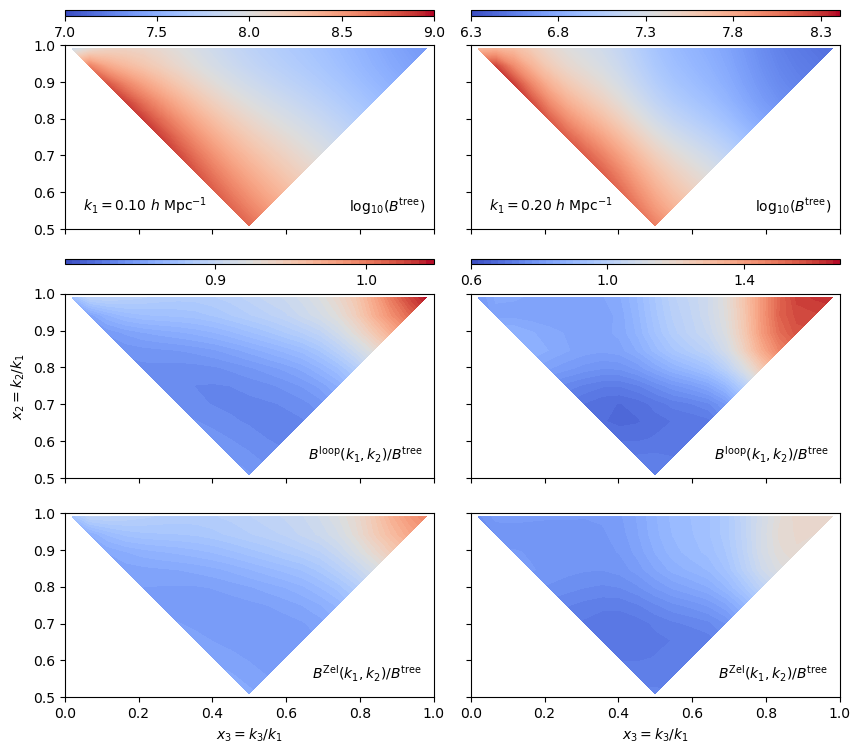

In [6]:
gridspec = {'height_ratios': [0.03, 1, 0.03, 1, 1],'width_ratios':[1,1],'hspace':0.2, 'wspace':0.1}
fig, ax = plt.subplots(5,2, figsize=(10,9), gridspec_kw=gridspec)

#### Left Panels
levels = np.arange(7.0, 9.01, 0.01)

plt.sca(ax[1,0])

plt.contourf(X3s, X2s, np.ma.array( np.log10(Btreesa), mask=mask), levels=levels, cmap='coolwarm')

ax[1,0].axis('square')

ax[1,0].set_xlim(0,1.0)
ax[1,0].set_ylim(0.5, 1)

ax[1,0].set_xticklabels([])

ax[1,0].text(0.05, 0.55, r'$k_1 = $%.2f $h$ Mpc$^{-1}$'%(k1a))
ax[1,0].text(0.77, 0.55, r'$\log_{10}(B^{\rm tree})$')

cax = ax[0,0]
cbar = plt.colorbar(cax=cax, format=tkr.FormatStrFormatter('%.1f'), orientation='horizontal')
cbar.set_ticks(np.arange(7, 9.1, 0.5)) 
#cbar.ax.xaxis.set_ticks_position("top")


levels = np.arange(0.8, 1.05, 0.005)

ax[3,0].contourf(X3s, X2s, np.ma.array( Bloopa/Btreesa, mask=mask),  levels=levels, cmap='coolwarm')
ax[3,0].text(0.66, 0.55,r'$B^{\rm loop}(k_1, k_2)/B^{\rm tree}$')

ax[3,0].axis('square')

ax[3,0].set_xlim(0,1.0)
ax[3,0].set_ylim(0.5, 1)

ax[3,0].set_xticklabels([])

ax[3,0].set_ylabel(r'$x_2 = k_2 / k_1$')


plt.sca(ax[4,0])

plt.contourf(X3s, X2s, np.ma.array( BZela/Btreesa, mask=mask), levels=levels, cmap='coolwarm')
plt.text(0.67, 0.55, r'$B^{\rm Zel}(k_1, k_2)/B^{\rm tree}$')
plt.xlabel(r'$x_3 = k_3 / k_1$')


ax[4,0].axis('square')

ax[4,0].set_xlim(0,1.0)
ax[4,0].set_ylim(0.5, 1)


cax = ax[2,0]
cbar = plt.colorbar(cax=cax,\
                    format=tkr.FormatStrFormatter('%.1f'), orientation='horizontal')
cbar.set_ticks(np.arange(0.9, 1.05, 0.1))



##### Right panels
levels = np.arange(6.3, 8.41, 0.01)

plt.sca(ax[1,1])

plt.contourf(X3s, X2s, np.ma.array( np.log10(Btreesb), mask=mask), levels=levels, cmap='coolwarm')

ax[1,1].axis('square')

ax[1,1].set_xlim(0,1.0)
ax[1,1].set_ylim(0.5, 1)

ax[1,1].set_xticklabels([])

ax[1,1].text(0.05, 0.55, r'$k_1 = $%.2f $h$ Mpc$^{-1}$'%(k1b))
ax[1,1].text(0.77, 0.55, r'$\log_{10}(B^{\rm tree})$')

ax[1,1].set_yticklabels([])

cax = ax[0,1]
cbar = plt.colorbar(cax=cax, format=tkr.FormatStrFormatter('%.1f'), orientation='horizontal')
cbar.set_ticks(np.arange(6.3, 8.4, 0.5)) 


levels = np.arange(0.6, 1.7, 0.02)

ax[3,1].contourf(X3s, X2s, np.ma.array( Bloopb/Btreesb, mask=mask),  levels=levels, cmap='coolwarm')
ax[3,1].text(0.66, 0.55,r'$B^{\rm loop}(k_1, k_2)/B^{\rm tree}$')

ax[3,1].axis('square')

ax[3,1].set_xlim(0,1.0)
ax[3,1].set_ylim(0.5, 1)

ax[3,1].set_xticklabels([])
ax[3,1].set_yticklabels([])


plt.sca(ax[4,1])

plt.contourf(X3s, X2s, np.ma.array( BZelb/Btreesb, mask=mask), levels=levels, cmap='coolwarm')
plt.text(0.67, 0.55, r'$B^{\rm Zel}(k_1, k_2)/B^{\rm tree}$')
plt.xlabel(r'$x_3 = k_3 / k_1$')


ax[4,1].axis('square')

ax[4,1].set_xlim(0,1.0)
ax[4,1].set_ylim(0.5, 1)

ax[4,1].set_yticklabels([])

cax = ax[2,1]
cbar = plt.colorbar(cax=cax,\
                    format=tkr.FormatStrFormatter('%.1f'), orientation='horizontal')
cbar.set_ticks(np.arange(0.6, 1.7, 0.4))

plt.savefig('triangle_plots.pdf',bbox_inches='tight',pad_inches = 0.25,)

/var/folders/sd/nbzbxs0j4xg86gnmcbpk7mq00000gq/T/ipykernel_36557/2900354065.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(X3s, X2s, np.ma.array( np.log10(Btreesa), mask=mask), levels=levels, cmap='coolwarm')
/var/folders/sd/nbzbxs0j4xg86gnmcbpk7mq00000gq/T/ipykernel_36557/2900354065.py:29: RuntimeWarning: invalid value encountered in true_divide
  ax[3,0].contourf(X3s, X2s, np.ma.array( Bloopa/Btreesa - 1, mask=mask),  levels=levels, cmap='coolwarm')
/var/folders/sd/nbzbxs0j4xg86gnmcbpk7mq00000gq/T/ipykernel_36557/2900354065.py:44: RuntimeWarning: invalid value encountered in true_divide
  plt.contourf(X3s, X2s, np.ma.array( BZela/Btreesa - 1, mask=mask), levels=levels, cmap='coolwarm')
/var/folders/sd/nbzbxs0j4xg86gnmcbpk7mq00000gq/T/ipykernel_36557/2900354065.py:67: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(X3s, X2s, np.ma.array( np.log10(Btreesb), mask=mask), levels=levels, cmap='coolwarm')
/var/folders/sd/nbzbxs0j4xg86gnmcbpk7mq00

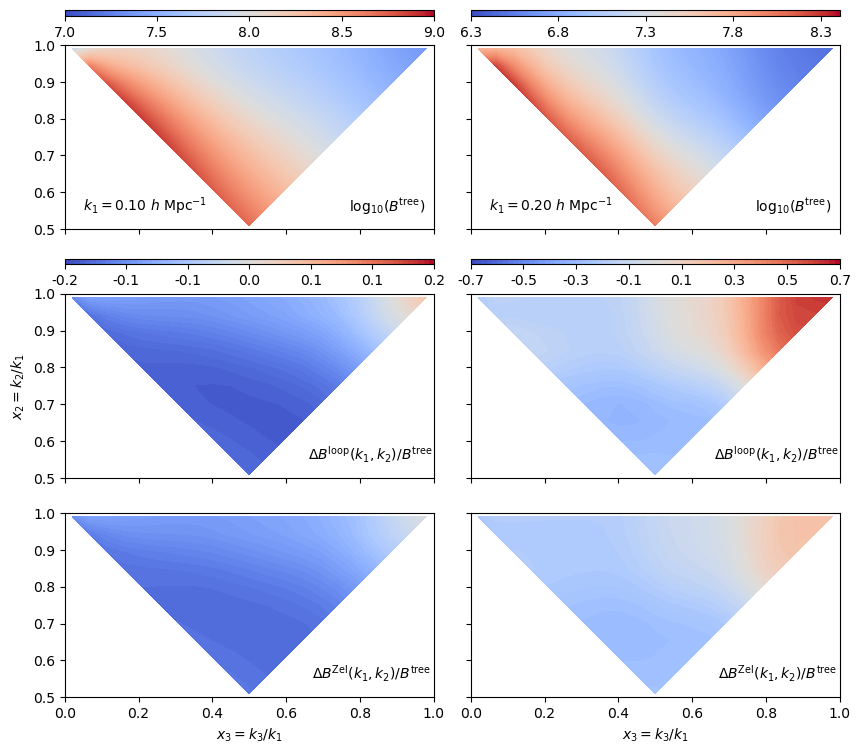

In [7]:
gridspec = {'height_ratios': [0.03, 1, 0.03, 1, 1],'width_ratios':[1,1],'hspace':0.2, 'wspace':0.1}
fig, ax = plt.subplots(5,2, figsize=(10,9), gridspec_kw=gridspec)

#### Left Panels
levels = np.arange(7.0, 9.01, 0.01)

plt.sca(ax[1,0])

plt.contourf(X3s, X2s, np.ma.array( np.log10(Btreesa), mask=mask), levels=levels, cmap='coolwarm')

ax[1,0].axis('square')

ax[1,0].set_xlim(0,1.0)
ax[1,0].set_ylim(0.5, 1)

ax[1,0].set_xticklabels([])

ax[1,0].text(0.05, 0.55, r'$k_1 = $%.2f $h$ Mpc$^{-1}$'%(k1a))
ax[1,0].text(0.77, 0.55, r'$\log_{10}(B^{\rm tree})$')

cax = ax[0,0]
cbar = plt.colorbar(cax=cax, format=tkr.FormatStrFormatter('%.1f'), orientation='horizontal')
cbar.set_ticks(np.arange(7, 9.1, 0.5)) 
#cbar.ax.xaxis.set_ticks_position("top")


levels = np.arange(-0.18, 0.185, 0.005)

ax[3,0].contourf(X3s, X2s, np.ma.array( Bloopa/Btreesa - 1, mask=mask),  levels=levels, cmap='coolwarm')
ax[3,0].text(0.66, 0.55,r'$\Delta B^{\rm loop}(k_1, k_2)/B^{\rm tree}$')

ax[3,0].axis('square')

ax[3,0].set_xlim(0,1.0)
ax[3,0].set_ylim(0.5, 1)

ax[3,0].set_xticklabels([])

ax[3,0].set_ylabel(r'$x_2 = k_2 / k_1$')


plt.sca(ax[4,0])

plt.contourf(X3s, X2s, np.ma.array( BZela/Btreesa - 1, mask=mask), levels=levels, cmap='coolwarm')
plt.text(0.67, 0.55, r'$\Delta B^{\rm Zel}(k_1, k_2)/B^{\rm tree}$')
plt.xlabel(r'$x_3 = k_3 / k_1$')


ax[4,0].axis('square')

ax[4,0].set_xlim(0,1.0)
ax[4,0].set_ylim(0.5, 1)


cax = ax[2,0]
cbar = plt.colorbar(cax=cax,\
                    format=tkr.FormatStrFormatter('%.1f'), orientation='horizontal')
cbar.set_ticks(np.arange(-0.18, 0.185, 0.06))



##### Right panels
levels = np.arange(6.3, 8.41, 0.01)

plt.sca(ax[1,1])

plt.contourf(X3s, X2s, np.ma.array( np.log10(Btreesb), mask=mask), levels=levels, cmap='coolwarm')

ax[1,1].axis('square')

ax[1,1].set_xlim(0,1.0)
ax[1,1].set_ylim(0.5, 1)

ax[1,1].set_xticklabels([])

ax[1,1].text(0.05, 0.55, r'$k_1 = $%.2f $h$ Mpc$^{-1}$'%(k1b))
ax[1,1].text(0.77, 0.55, r'$\log_{10}(B^{\rm tree})$')

ax[1,1].set_yticklabels([])

cax = ax[0,1]
cbar = plt.colorbar(cax=cax, format=tkr.FormatStrFormatter('%.1f'), orientation='horizontal')
cbar.set_ticks(np.arange(6.3, 8.4, 0.5)) 


levels = np.arange(-0.7, 0.72, 0.02)

ax[3,1].contourf(X3s, X2s, np.ma.array( Bloopb/Btreesb - 1, mask=mask),  levels=levels, cmap='coolwarm')
ax[3,1].text(0.66, 0.55,r'$\Delta B^{\rm loop}(k_1, k_2)/B^{\rm tree}$')

ax[3,1].axis('square')

ax[3,1].set_xlim(0,1.0)
ax[3,1].set_ylim(0.5, 1)

ax[3,1].set_xticklabels([])
ax[3,1].set_yticklabels([])


plt.sca(ax[4,1])

plt.contourf(X3s, X2s, np.ma.array( BZelb/Btreesb - 1, mask=mask), levels=levels, cmap='coolwarm')
plt.text(0.67, 0.55, r'$\Delta B^{\rm Zel}(k_1, k_2)/B^{\rm tree}$')
plt.xlabel(r'$x_3 = k_3 / k_1$')


ax[4,1].axis('square')

ax[4,1].set_xlim(0,1.0)
ax[4,1].set_ylim(0.5, 1)

ax[4,1].set_yticklabels([])

cax = ax[2,1]
cbar = plt.colorbar(cax=cax,\
                    format=tkr.FormatStrFormatter('%.1f'), orientation='horizontal')
cbar.set_ticks(np.arange(-0.7, 0.72, 0.2))

plt.savefig('triangle_plots_zero_center.pdf',bbox_inches='tight',pad_inches = 0.25,)

## Figure 4

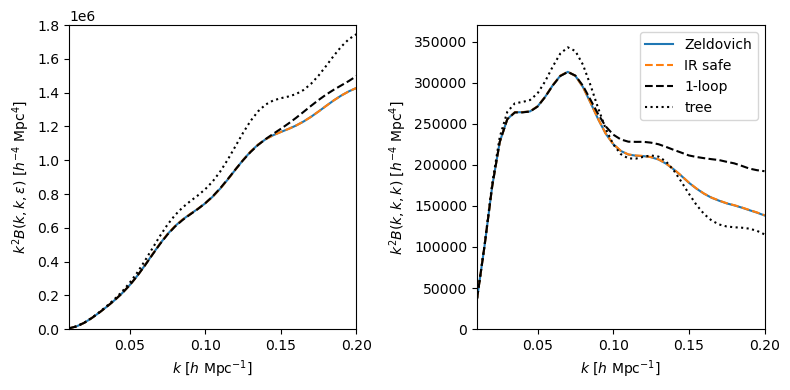

In [8]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,2)

ks = np.arange(0.01, 0.205, 0.005)
Bs_ir = np.zeros_like(ks)
Bs_naive = np.zeros_like(ks)
Bs_tree = np.zeros_like(ks)
Bs_loop = np.zeros_like(ks)


for ii, k in enumerate(ks):
    
    epsilon = 0.05
    
    k1vec = k * np.array([0,0,1])
    k2vec = k * np.array([np.sqrt(3)/2,0,-0.5])
    k3vec = k * np.array([-np.sqrt(3)/2,0,-0.5])
    
    vdict = {1: k1vec, 2:k2vec, 3:k3vec}
    
    Binf, Bfin = lpt.Btree({1: k1vec, 2:k2vec, 3:-k1vec-k2vec})
    Bs_tree[ii] = Binf
    
    Binf, Bfin = lpt.B1loop({1: k1vec, 2:k2vec, 3:-k1vec-k2vec})
    Bs_loop[ii] = Binf + Bfin
    
    Binf, Bfin = lpt.Bzel({1: k1vec, 2:k2vec, 3:-k1vec-k2vec})
    Bs_ir[ii] = Binf + Bfin
    
    Binf, Bfin = lpt.Bzel_naive({1: k1vec, 2:k2vec, 3:-k1vec-k2vec})
    Bs_naive[ii] = Binf + Bfin
    

plt.plot(ks, ks**2 * Bs_naive, label='Zeldovich')
plt.plot(ks, ks**2 * Bs_ir, '--', label='IR safe')

plt.plot(ks, ks**2 * Bs_loop, 'k--',label='1-loop')

plt.plot(ks, ks**2 * Bs_tree, 'k:', label='tree')

#plt.legend()

plt.xlim(0.01,0.2)
plt.ylim(0,370000 * Dfac**2)

plt.legend(loc='upper right')

plt.xlabel(r"$k$ [$h$ Mpc$^{-1}$]")
plt.ylabel(r"$k^2 B(k,k,k)$ [$h^{-4}$ Mpc$^4$]")

plt.subplot(1,2,1)

ks = np.arange(0.01, 0.205, 0.005)
Bs_ir = np.zeros_like(ks)
Bs_naive = np.zeros_like(ks)
Bs_tree = np.zeros_like(ks)
Bs_loop = np.zeros_like(ks)


for ii, k in enumerate(ks):
    
    epsilon = 0.05
    
    k1vec = k * np.array([epsilon/2,0, 1])
    k2vec = k * np.array([epsilon/2,0,-1])
    k3vec = k * np.array([-epsilon,0,0])
    
    vdict = {1: k1vec, 2:k2vec, 3:k3vec}
    
    Binf, Bfin = lpt.Btree({1: k1vec, 2:k2vec, 3:-k1vec-k2vec})
    Bs_tree[ii] = Binf
    
    Binf, Bfin = lpt.B1loop({1: k1vec, 2:k2vec, 3:-k1vec-k2vec})
    Bs_loop[ii] = Binf + Bfin
    
    Binf, Bfin = lpt.Bzel({1: k1vec, 2:k2vec, 3:-k1vec-k2vec})
    Bs_ir[ii] = Binf + Bfin
    
    Binf, Bfin = lpt.Bzel_naive({1: k1vec, 2:k2vec, 3:-k1vec-k2vec})
    Bs_naive[ii] = Binf + Bfin
    

plt.plot(ks, ks**2 * Bs_naive, label='Zeldovich')
plt.plot(ks, ks**2 * Bs_ir, '--', label='IR safe')

plt.plot(ks, ks**2 * Bs_loop, 'k--',label='1-loop')

plt.plot(ks, ks**2 * Bs_tree, 'k:', label='tree')

plt.xlim(0.01,0.2)
plt.ylim(0,1800000 * Dfac**2)

plt.xlabel(r"$k$ [$h$ Mpc$^{-1}$]")
plt.ylabel(r"$k^2 B(k,k,\epsilon)$ [$h^{-4}$ Mpc$^4$]")

plt.tight_layout()

plt.savefig('numerical.pdf')

## Figure 5

0.001
0.003
0.01
0.03
0.001
0.003
0.01
0.03


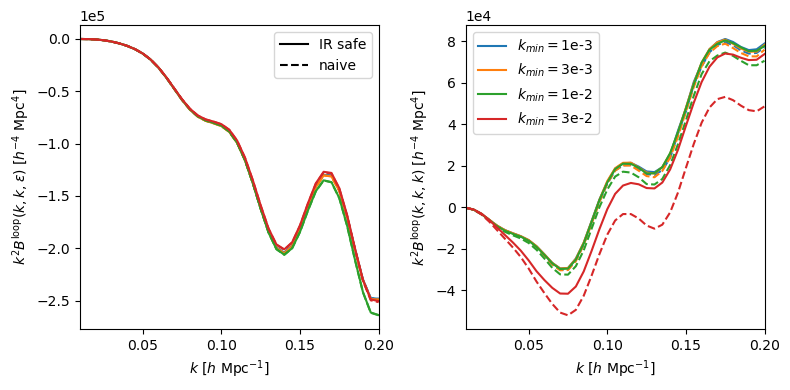

In [9]:
kmins = [1e-3, 3e-3, 1e-2, 3e-2]

plt.figure(figsize=(8,4))

plt.subplot(1,2,2)

Bs_equi = np.zeros( (len(kmins),len(ks)))
Bs_equi_naive = np.zeros( (len(kmins),len(ks)))


for jj, kmin in enumerate(kmins):
    
    print(kmin)
    
    lpt = ZeldovichBispectrum(klin, Dfac * plin, kint_min=np.log10(kmin))
        
    for ii, k in enumerate(ks):
    
        k1vec = k * np.array([0,0,1])
        k2vec = k * np.array([np.sqrt(3)/2,0,-0.5])
        k3vec = k * np.array([-np.sqrt(3)/2,0,-0.5])
    
        vdict = {1: k1vec, 2:k2vec, 3:k3vec}

        Btree, x = lpt.Btree(vdict)
        
        Binf, Bfin = lpt.B1loop(vdict)
        Bs_equi[jj,ii] = Binf + Bfin - Btree
        
        Binf, Bfin = lpt.B1loop_naive(vdict)
        Bs_equi_naive[jj,ii] = Binf + Bfin - Btree
        
for ii, kmin in enumerate(kmins):
    
    plt.plot(ks, ks**2 * Bs_equi[ii], 'C'+str(ii), label=(r'$k_{min} = $%.0e'%(kmin)).replace("e-0", "e-"))
    plt.plot(ks, ks**2 * Bs_equi_naive[ii], 'C'+str(ii) + "--")


#plt.legend()

plt.legend()

plt.xlim(0.01,0.2)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))

#plt.ylim(0,400000 * Dfac**2)

plt.xlabel(r"$k$ [$h$ Mpc$^{-1}$]")
plt.ylabel(r"$k^2 B^{\rm loop}(k,k,k)$ [$h^{-4}$ Mpc$^4$]")
        
plt.subplot(1,2,1)

Bs_equi = np.zeros( (len(kmins),len(ks)))
Bs_equi_naive = np.zeros( (len(kmins),len(ks)))

for jj, kmin in enumerate(kmins):
    
    print(kmin)
    
    lpt = ZeldovichBispectrum(klin, Dfac * plin, kint_min=np.log10(kmin), kint_N=512)
        
    for ii, k in enumerate(ks):
    
        k1vec = k * np.array([0.025,0, 1])
        k2vec = k * np.array([0.025,0,-1])
        k3vec = k * np.array([-0.05,0,0])
    
        vdict = {1: k1vec, 2:k2vec, 3:k3vec}

        Btree, x = lpt.Btree(vdict)
        
        Binf, Bfin = lpt.B1loop(vdict)
        Bs_equi[jj,ii] = Binf + Bfin - Btree
        
        Binf, Bfin = lpt.B1loop_naive(vdict)
        Bs_equi_naive[jj,ii] = Binf + Bfin - Btree

for ii, kmin in enumerate(kmins):
    
    plt.plot(ks, ks**2 * Bs_equi[ii], 'C'+str(ii))
    plt.plot(ks, ks**2 * Bs_equi_naive[ii], 'C'+str(ii) + "--")


plt.plot(np.nan,np.nan,'k',label='IR safe')
plt.plot(np.nan,np.nan,'k--',label='naive')
plt.legend()

plt.xlim(0.01,0.2)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))

#plt.ylim(0,2000000 * Dfac**2)

plt.xlabel(r"$k$ [$h$ Mpc$^{-1}$]")
plt.ylabel(r"$k^2 B^{\rm loop}(k,k,\epsilon)$ [$h^{-4}$ Mpc$^4$]")

plt.tight_layout()
plt.savefig('kmin.pdf')